# HW2
Real Time Machine Learning
Jacob Barker
801075553

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_flops import get_flops
from d2l import tensorflow as d2l
import numpy as np
import cv2

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#scaling image values
train_images = train_images / 255
test_images = test_images / 255
print(train_images.shape)

x_val = train_images[-10000:]
y_val = train_labels[-10000:]

x_train = train_images[:-10000]
y_train = train_labels[:-10000]


2023-02-21 15:22:52.949333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 15:22:53.536051: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jacob/miniconda3/envs/tf/lib/
2023-02-21 15:22:53.536150: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jacob/miniconda3/envs/tf/lib/
2023-02-21 15:22:53.536155: W tensorflow/compiler/tf2ten

(60000, 28, 28)


Problem 1 (20pts)

Let’s modernize LeNet as we did in the lectures. Implement and test the following changes over FashionMNIST

    Replace the average pooling with max-pooling.
    Replace the softmax layer with ReLU.

Start training from scratch based on FashinMNIST. Compare the training loss, training accuracy, and validation accuracy against the baseline we did in the lectures.

2023-02-21 15:22:58.383403: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-02-21 15:22:58.383442: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jacobs-PC
2023-02-21 15:22:58.383467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jacobs-PC
2023-02-21 15:22:58.383567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.60.13
2023-02-21 15:22:58.383606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.60.13
2023-02-21 15:22:58.383611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.60.13
2023-02-21 15:22:58.384057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Networ

Epoch 1/20
3125/3125 [==============================] - 13s 4ms/step - loss: 2.3078 - accuracy: 0.1006 - val_loss: 2.3025 - val_accuracy: 0.1021
Epoch 2/20
3125/3125 [==============================] - 13s 4ms/step - loss: 2.3057 - accuracy: 0.1025 - val_loss: 2.3036 - val_accuracy: 0.0970
Epoch 3/20
3125/3125 [==============================] - 13s 4ms/step - loss: 2.3041 - accuracy: 0.1031 - val_loss: 2.3034 - val_accuracy: 0.1203
Epoch 4/20
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2979 - accuracy: 0.1176 - val_loss: 2.2870 - val_accuracy: 0.1195
Epoch 5/20
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2190 - accuracy: 0.2283 - val_loss: 2.0090 - val_accuracy: 0.3512
Epoch 6/20
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5868 - accuracy: 0.4569 - val_loss: 1.2959 - val_accuracy: 0.5310
Epoch 7/20
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1820 - accuracy: 0.5653 - val_loss: 1.0884 - val_ac

2023-02-21 15:27:16.327681: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 15:27:16.327767: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


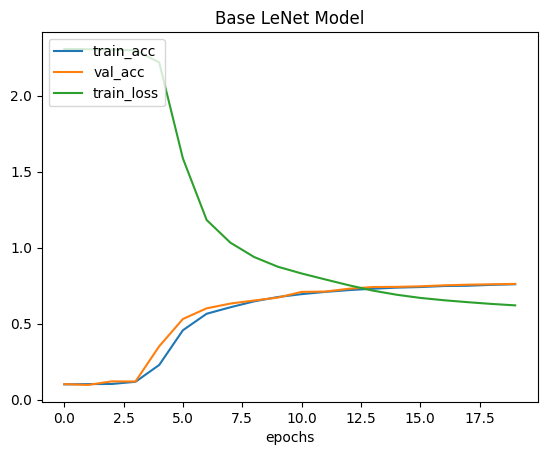

In [2]:
#PART 1:
#****************************8
'''This is the baseline LeNet Model From class'''

LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='sigmoid'),
    tf.keras.layers.Dense(84, activation='sigmoid'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenet = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("Baseline LeNet Model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
plt.plot(lenet.history['accuracy'])
plt.plot(lenet.history['val_accuracy'])
plt.plot(lenet.history['loss'])
plt.title('Base LeNet Model')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

Epoch 1/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.7439 - accuracy: 0.7223 - val_loss: 0.5260 - val_accuracy: 0.8042
Epoch 2/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4527 - accuracy: 0.8347 - val_loss: 0.4418 - val_accuracy: 0.8388
Epoch 3/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3884 - accuracy: 0.8576 - val_loss: 0.3724 - val_accuracy: 0.8657
Epoch 4/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.3563 - accuracy: 0.8681 - val_loss: 0.3562 - val_accuracy: 0.8685
Epoch 5/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3320 - accuracy: 0.8792 - val_loss: 0.3398 - val_accuracy: 0.8817
Epoch 6/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3159 - accuracy: 0.8846 - val_loss: 0.3361 - val_accuracy: 0.8785
Epoch 7/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3014 - accuracy: 0.8891 - val_loss: 0.3194 - val_ac

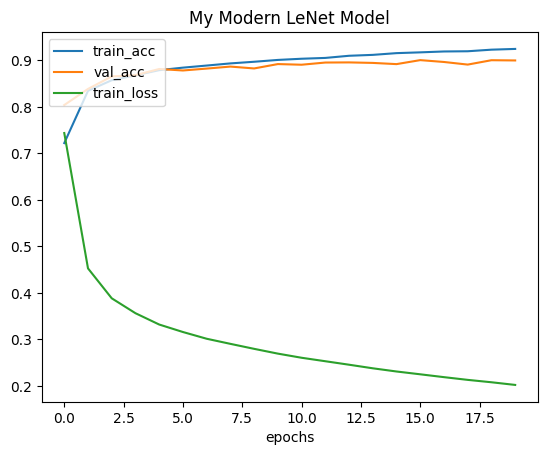

In [3]:
#**********************************
'''My Modernized LeNet Model'''
ModernLeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

ModernLeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

history = ModernLeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("My more modern LeNet model")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('My Modern LeNet Model')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()

In [25]:
flops = get_flops(ModernLeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(ModernLeNet.summary())


=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.
flops: Number of float operations. Note: Please read the implementation for the math behind it.

Profi

2023-02-21 19:37:52.132931: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 19:37:52.133015: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Problem 2 (40pts)

Try to change the size of the LeNet style network to improve its accuracy in addition to max-pooling and ReLU.

    Adjust the convolution window size.
    Adjust the number of output channels (width of each layer).
    Adjust the number of convolution layers.
    Adjust the number of fully connected layers.
    Explore the learning rates.

For all training adjustments, restart training from scratch based on FashinMNIST. Compare the training loss, training accuracy, and validation accuracy against each other and the baseline in problem 1. Argue which adjustment presents the better benefit and generalization. Measure and compare theoretical computation complexity (number of operations and parameters size) using ptflops https://pypi.org/project/ptflops/

Epoch 1/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7668 - accuracy: 0.7122 - val_loss: 0.5327 - val_accuracy: 0.7983
Epoch 2/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4651 - accuracy: 0.8279 - val_loss: 0.4470 - val_accuracy: 0.8376
Epoch 3/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4003 - accuracy: 0.8535 - val_loss: 0.3868 - val_accuracy: 0.8589
Epoch 4/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3631 - accuracy: 0.8673 - val_loss: 0.3518 - val_accuracy: 0.8736
Epoch 5/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3362 - accuracy: 0.8773 - val_loss: 0.3499 - val_accuracy: 0.8717
Epoch 6/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3187 - accuracy: 0.8839 - val_loss: 0.3445 - val_accuracy: 0.8734
Epoch 7/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3020 - accuracy: 0.8890 - val_loss: 0.3244 - val_ac

2023-02-21 16:09:17.151823: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 16:09:17.151908: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Epoch 1/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7271 - accuracy: 0.7308 - val_loss: 0.5042 - val_accuracy: 0.8176
Epoch 2/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4787 - accuracy: 0.8246 - val_loss: 0.4564 - val_accuracy: 0.8350
Epoch 3/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.4139 - accuracy: 0.8490 - val_loss: 0.3966 - val_accuracy: 0.8564
Epoch 4/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3748 - accuracy: 0.8634 - val_loss: 0.4033 - val_accuracy: 0.8534
Epoch 5/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.3504 - accuracy: 0.8723 - val_loss: 0.3535 - val_accuracy: 0.8700
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3296 - accuracy: 0.8794 - val_loss: 0.3412 - val_accuracy: 0.8775
Epoch 7/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3135 - accuracy: 0.8859 - val_loss: 0.3444 - val_ac

2023-02-21 16:14:27.115570: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 16:14:27.115661: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


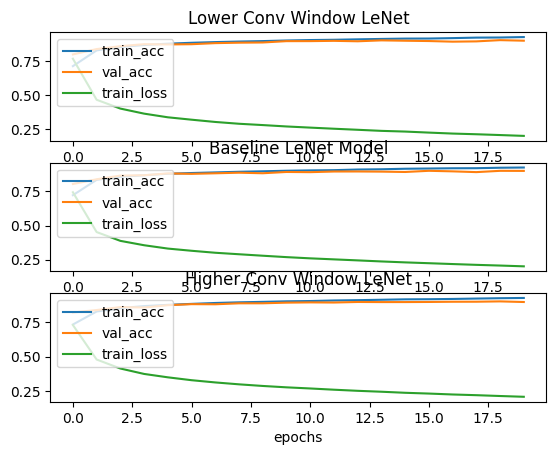

In [8]:
#******************************************************
#PART 2

#1 - Adjusting Convolution Window size
'''I ran the LeNet model with a lower and higher Convolution size
    compared to the baseline LeNet Model from lecture'''

#lower conv window size model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("smaller convolution window size model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#higher conv window size model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=7, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=7, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("Larger conv window size model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Conv Window LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Baseline LeNet Model')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Conv Window LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()

Epoch 1/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7527 - accuracy: 0.7184 - val_loss: 0.5495 - val_accuracy: 0.7960
Epoch 2/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4920 - accuracy: 0.8202 - val_loss: 0.4666 - val_accuracy: 0.8292
Epoch 3/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4306 - accuracy: 0.8434 - val_loss: 0.4314 - val_accuracy: 0.8449
Epoch 4/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3989 - accuracy: 0.8568 - val_loss: 0.4271 - val_accuracy: 0.8442
Epoch 5/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3761 - accuracy: 0.8635 - val_loss: 0.4045 - val_accuracy: 0.8566
Epoch 6/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3610 - accuracy: 0.8695 - val_loss: 0.3668 - val_accuracy: 0.8695
Epoch 7/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3478 - accuracy: 0.8746 - val_loss: 0.3658 - val_ac

2023-02-21 17:00:00.539023: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 17:00:00.539110: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Epoch 1/20
3125/3125 [==============================] - 52s 17ms/step - loss: 0.7219 - accuracy: 0.7338 - val_loss: 0.4793 - val_accuracy: 0.8329
Epoch 2/20
3125/3125 [==============================] - 51s 16ms/step - loss: 0.4396 - accuracy: 0.8387 - val_loss: 0.4196 - val_accuracy: 0.8500
Epoch 3/20
3125/3125 [==============================] - 52s 16ms/step - loss: 0.3771 - accuracy: 0.8628 - val_loss: 0.3788 - val_accuracy: 0.8622
Epoch 4/20
3125/3125 [==============================] - 50s 16ms/step - loss: 0.3423 - accuracy: 0.8752 - val_loss: 0.3413 - val_accuracy: 0.8760
Epoch 5/20
3125/3125 [==============================] - 47s 15ms/step - loss: 0.3170 - accuracy: 0.8840 - val_loss: 0.3361 - val_accuracy: 0.8790
Epoch 6/20
3125/3125 [==============================] - 52s 17ms/step - loss: 0.2967 - accuracy: 0.8899 - val_loss: 0.3262 - val_accuracy: 0.8836
Epoch 7/20
3125/3125 [==============================] - 52s 17ms/step - loss: 0.2814 - accuracy: 0.8962 - val_loss: 0.3006 -

2023-02-21 17:17:21.918387: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 17:17:21.918469: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


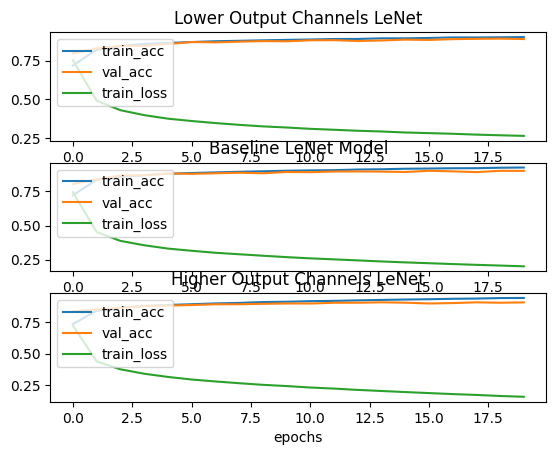

In [13]:
#******************************
#2 Adjustin the number of output channels
'''I ran the LeNet model with a lower and higher output channels
    compared to the baseline LeNet Model from lecture'''
#lower Output channels model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("Less output channels model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#higher Ouptu channels model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=12, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(240, activation='relu'),
    tf.keras.layers.Dense(168, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("More output channels model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())
BestModel = lenetHigh
#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Output Channels LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Baseline LeNet Model')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Output Channels LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()


Epoch 1/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6404 - accuracy: 0.7691 - val_loss: 0.5180 - val_accuracy: 0.8119
Epoch 2/20
3125/3125 [==============================] - 11s 4ms/step - loss: 0.4295 - accuracy: 0.8457 - val_loss: 0.4198 - val_accuracy: 0.8467
Epoch 3/20
3125/3125 [==============================] - 11s 4ms/step - loss: 0.3736 - accuracy: 0.8652 - val_loss: 0.3673 - val_accuracy: 0.8698
Epoch 4/20
3125/3125 [==============================] - 11s 4ms/step - loss: 0.3405 - accuracy: 0.8762 - val_loss: 0.3578 - val_accuracy: 0.8694
Epoch 5/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3174 - accuracy: 0.8842 - val_loss: 0.3302 - val_accuracy: 0.8808
Epoch 6/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2997 - accuracy: 0.8920 - val_loss: 0.3201 - val_accuracy: 0.8869
Epoch 7/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2835 - accuracy: 0.8966 - val_loss: 0.3010 - val_ac

2023-02-21 16:29:21.895548: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 16:29:21.895630: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Epoch 1/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9637 - accuracy: 0.6322 - val_loss: 0.6459 - val_accuracy: 0.7537
Epoch 2/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5368 - accuracy: 0.8012 - val_loss: 0.4710 - val_accuracy: 0.8330
Epoch 3/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4418 - accuracy: 0.8408 - val_loss: 0.4135 - val_accuracy: 0.8564
Epoch 4/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3950 - accuracy: 0.8580 - val_loss: 0.4084 - val_accuracy: 0.8569
Epoch 5/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3680 - accuracy: 0.8673 - val_loss: 0.3649 - val_accuracy: 0.8686
Epoch 6/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3467 - accuracy: 0.8729 - val_loss: 0.3611 - val_accuracy: 0.8711
Epoch 7/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3300 - accuracy: 0.8795 - val_loss: 0.3777 - val_ac

2023-02-21 16:33:53.679832: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 16:33:53.679914: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


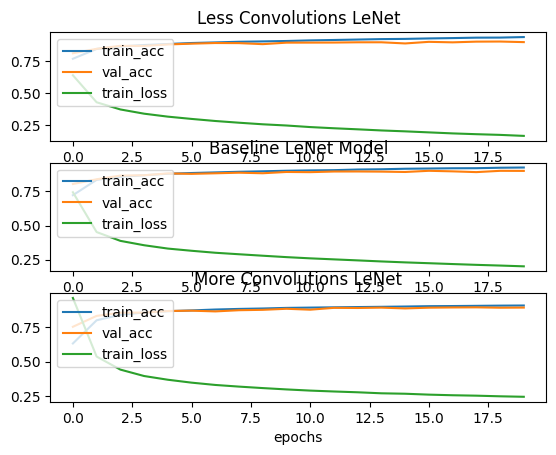

In [10]:
#**********************************************
#3 Adjusting the number of convolution layers
'''I ran the LeNet model with a lower and higher convolution layers
    compared to the baseline LeNet Model from lecture'''
#lower conv model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("less convolutions model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#higher conv model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("More convolutions model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Less Convolutions LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Baseline LeNet Model')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('More Convolutions LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()


Epoch 1/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.7094 - accuracy: 0.7408 - val_loss: 0.5251 - val_accuracy: 0.8017
Epoch 2/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4567 - accuracy: 0.8336 - val_loss: 0.4200 - val_accuracy: 0.8529
Epoch 3/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3965 - accuracy: 0.8565 - val_loss: 0.4120 - val_accuracy: 0.8520
Epoch 4/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3637 - accuracy: 0.8686 - val_loss: 0.3791 - val_accuracy: 0.8672
Epoch 5/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3401 - accuracy: 0.8776 - val_loss: 0.3438 - val_accuracy: 0.8785
Epoch 6/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3224 - accuracy: 0.8837 - val_loss: 0.3256 - val_accuracy: 0.8827
Epoch 7/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.3092 - accuracy: 0.8879 - val_loss: 0.3142 - val_ac

2023-02-21 16:38:39.740495: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 16:38:39.740580: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Epoch 1/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7569 - accuracy: 0.7127 - val_loss: 0.5168 - val_accuracy: 0.8153
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4728 - accuracy: 0.8262 - val_loss: 0.4627 - val_accuracy: 0.8332
Epoch 3/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4048 - accuracy: 0.8512 - val_loss: 0.3843 - val_accuracy: 0.8609
Epoch 4/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.3665 - accuracy: 0.8654 - val_loss: 0.3869 - val_accuracy: 0.8612
Epoch 5/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3414 - accuracy: 0.8728 - val_loss: 0.3444 - val_accuracy: 0.8745
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3213 - accuracy: 0.8830 - val_loss: 0.3357 - val_accuracy: 0.8743
Epoch 7/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.3059 - accuracy: 0.8869 - val_loss: 0.3444 - val_ac

2023-02-21 16:43:31.354837: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 16:43:31.354920: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


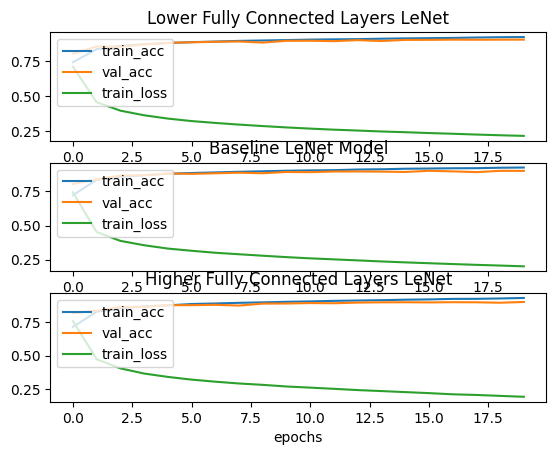

In [11]:
#**************************************************
#4 Adjust the number of fully connected layers
'''I ran the LeNet model with a lower and higher fully connected layers
    compared to the baseline LeNet Model from lecture'''
#lower Fully connected layers model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("less fully connecyed layers model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#higher Fully Connected layers model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("More fully connected layers model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Fully Connected Layers LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Baseline LeNet Model')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Fully Connected Layers LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()


Epoch 1/20
3125/3125 [==============================] - 16s 5ms/step - loss: 2.2945 - accuracy: 0.1595 - val_loss: 2.2886 - val_accuracy: 0.2184
Epoch 2/20
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2833 - accuracy: 0.2659 - val_loss: 2.2767 - val_accuracy: 0.3181
Epoch 3/20
3125/3125 [==============================] - 14s 5ms/step - loss: 2.2708 - accuracy: 0.3370 - val_loss: 2.2625 - val_accuracy: 0.3639
Epoch 4/20
3125/3125 [==============================] - 14s 5ms/step - loss: 2.2540 - accuracy: 0.3712 - val_loss: 2.2419 - val_accuracy: 0.3823
Epoch 5/20
3125/3125 [==============================] - 15s 5ms/step - loss: 2.2281 - accuracy: 0.3868 - val_loss: 2.2085 - val_accuracy: 0.3912
Epoch 6/20
3125/3125 [==============================] - 14s 5ms/step - loss: 2.1843 - accuracy: 0.3903 - val_loss: 2.1504 - val_accuracy: 0.3973
Epoch 7/20
3125/3125 [==============================] - 14s 5ms/step - loss: 2.1044 - accuracy: 0.4011 - val_loss: 2.0414 - val_ac

2023-02-21 17:22:40.421343: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 17:22:40.421445: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


Epoch 1/20
3125/3125 [==============================] - 46s 15ms/step - loss: 0.5190 - accuracy: 0.8092 - val_loss: 0.3909 - val_accuracy: 0.8575
Epoch 2/20
3125/3125 [==============================] - 45s 14ms/step - loss: 0.3631 - accuracy: 0.8654 - val_loss: 0.3745 - val_accuracy: 0.8628
Epoch 3/20
3125/3125 [==============================] - 26s 8ms/step - loss: 0.3225 - accuracy: 0.8802 - val_loss: 0.3729 - val_accuracy: 0.8671
Epoch 4/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3019 - accuracy: 0.8873 - val_loss: 0.3203 - val_accuracy: 0.8848
Epoch 5/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.2828 - accuracy: 0.8932 - val_loss: 0.3232 - val_accuracy: 0.8819
Epoch 6/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.2709 - accuracy: 0.8994 - val_loss: 0.3140 - val_accuracy: 0.8858
Epoch 7/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.2597 - accuracy: 0.9023 - val_loss: 0.3326 - val_

2023-02-21 17:28:42.728451: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 17:28:42.728536: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


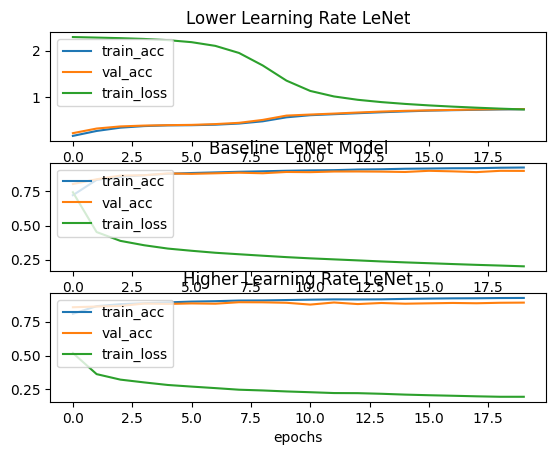

In [14]:
#************************************************
#5 Ajusting Learning rates
'''I ran the LeNet model with a lower and higher learning rate
    compared to the baseline LeNet Model from lecture'''
#lower learning rate model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("lower learning rate model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#higher Learning rate model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=7, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=7, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("higher learning rate model")
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(LeNet.summary())

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Learning Rate LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('Baseline LeNet Model')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Learning Rate LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()

Problem 3 (10pts)

Pick the best model from problem 2. Apply dropout to LeNet-5 across all experiments in problem 2. Does it improve the training? For all training adjustments, restart training from scratch based on FashinMNIST. Compare the training loss, training accuracy, and validation accuracy against the best model in problem 2.

Epoch 1/20
3125/3125 [==============================] - 17s 5ms/step - loss: 0.8021 - accuracy: 0.6913 - val_loss: 0.6076 - val_accuracy: 0.7830
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.5333 - accuracy: 0.8013 - val_loss: 0.4867 - val_accuracy: 0.8244
Epoch 3/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4656 - accuracy: 0.8275 - val_loss: 0.4611 - val_accuracy: 0.8415
Epoch 4/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4255 - accuracy: 0.8434 - val_loss: 0.4168 - val_accuracy: 0.8596
Epoch 5/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.3998 - accuracy: 0.8543 - val_loss: 0.3992 - val_accuracy: 0.8613
Epoch 6/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.3820 - accuracy: 0.8593 - val_loss: 0.3790 - val_accuracy: 0.8664
Epoch 7/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.3668 - accuracy: 0.8641 - val_loss: 0.3723 - val_ac

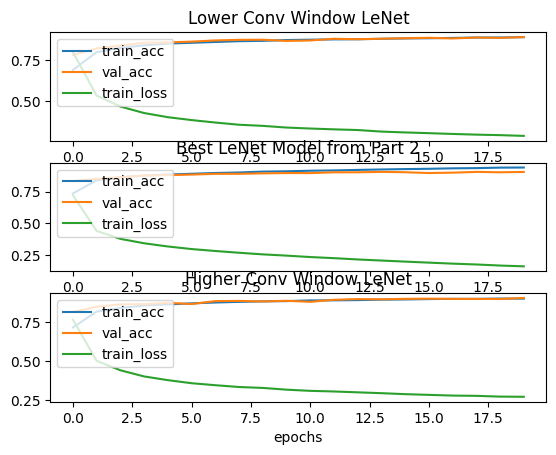

In [15]:
#******************************************************
#PART 3
'''Applying dropout across all experiments in PART 2'''


#1 - Adjusting Convolution Window size with dropout
'''I ran the LeNet model with a lower and higher Convolution size
    compared to the baseline LeNet Model from lecture'''

#lower conv window size model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("lower conv window size with dropout model")

#higher conv window size model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=7, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=7, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("larger conv windows ize with dropout model")

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Conv Window LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(BestModel.history['accuracy'])
plt.plot(BestModel.history['val_accuracy'])
plt.plot(BestModel.history['loss'])
plt.title('Best LeNet Model from Part 2')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Conv Window LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()

Epoch 1/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8543 - accuracy: 0.6743 - val_loss: 0.6323 - val_accuracy: 0.7895
Epoch 2/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5845 - accuracy: 0.7817 - val_loss: 0.5512 - val_accuracy: 0.8099
Epoch 3/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.5204 - accuracy: 0.8082 - val_loss: 0.5013 - val_accuracy: 0.8269
Epoch 4/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4797 - accuracy: 0.8250 - val_loss: 0.4581 - val_accuracy: 0.8495
Epoch 5/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4538 - accuracy: 0.8338 - val_loss: 0.4381 - val_accuracy: 0.8473
Epoch 6/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4346 - accuracy: 0.8395 - val_loss: 0.4098 - val_accuracy: 0.8490
Epoch 7/20
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4218 - accuracy: 0.8456 - val_loss: 0.4212 - val_ac

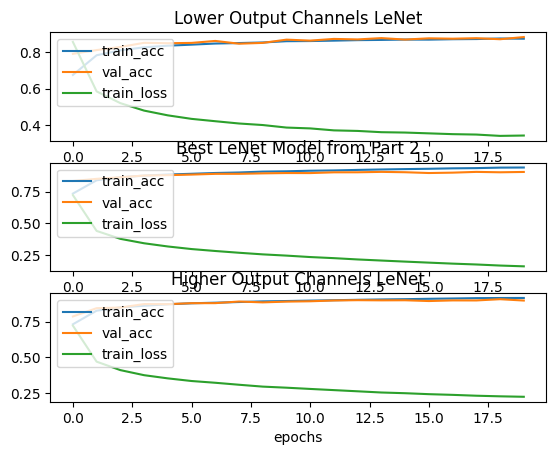

In [16]:
#******************************
#2 Adjustin the number of output channels with dropout
'''I ran the LeNet model with a lower and higher output channels
    compared to the baseline LeNet Model from lecture'''
#lower Output channels model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=3, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("lower output channels with dropout model")

#higher Ouptu channels model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=12, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(240, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(168, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("higher output channels model with dropout")

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Output Channels LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(BestModel.history['accuracy'])
plt.plot(BestModel.history['val_accuracy'])
plt.plot(BestModel.history['loss'])
plt.title('Best LeNet Model from Part 2')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Output Channels LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()

Epoch 1/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7147 - accuracy: 0.7322 - val_loss: 0.5346 - val_accuracy: 0.8024
Epoch 2/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4921 - accuracy: 0.8202 - val_loss: 0.4361 - val_accuracy: 0.8398
Epoch 3/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4334 - accuracy: 0.8432 - val_loss: 0.4029 - val_accuracy: 0.8553
Epoch 4/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3948 - accuracy: 0.8565 - val_loss: 0.3672 - val_accuracy: 0.8640
Epoch 5/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3717 - accuracy: 0.8651 - val_loss: 0.3586 - val_accuracy: 0.8704
Epoch 6/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3525 - accuracy: 0.8720 - val_loss: 0.3383 - val_accuracy: 0.8796
Epoch 7/20
3125/3125 [==============================] - 14s 4ms/step - loss: 0.3377 - accuracy: 0.8759 - val_loss: 0.3362 - val_ac

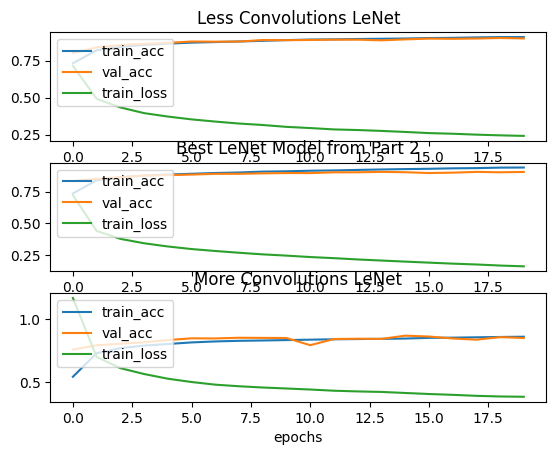

In [17]:
#**********************************************
#3 Adjusting the number of convolution layers with dropout
'''I ran the LeNet model with a lower and higher convolution layers
    compared to the baseline LeNet Model from lecture'''
#lower conv model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("less convolutions model with dropout")

#higher conv model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("More conv model with ddropout")

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Less Convolutions LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(BestModel.history['accuracy'])
plt.plot(BestModel.history['val_accuracy'])
plt.plot(BestModel.history['loss'])
plt.title('Best LeNet Model from Part 2')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('More Convolutions LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()

Epoch 1/20
3125/3125 [==============================] - 17s 5ms/step - loss: 0.6810 - accuracy: 0.7506 - val_loss: 0.5447 - val_accuracy: 0.8227
Epoch 2/20
3125/3125 [==============================] - 17s 5ms/step - loss: 0.4602 - accuracy: 0.8344 - val_loss: 0.4632 - val_accuracy: 0.8482
Epoch 3/20
3125/3125 [==============================] - 17s 5ms/step - loss: 0.4062 - accuracy: 0.8520 - val_loss: 0.4408 - val_accuracy: 0.8623
Epoch 4/20
3125/3125 [==============================] - 17s 5ms/step - loss: 0.3745 - accuracy: 0.8640 - val_loss: 0.4217 - val_accuracy: 0.8569
Epoch 5/20
3125/3125 [==============================] - 15s 5ms/step - loss: 0.3563 - accuracy: 0.8693 - val_loss: 0.3803 - val_accuracy: 0.8702
Epoch 6/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.3403 - accuracy: 0.8754 - val_loss: 0.3713 - val_accuracy: 0.8753
Epoch 7/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.3277 - accuracy: 0.8803 - val_loss: 0.3488 - val_ac

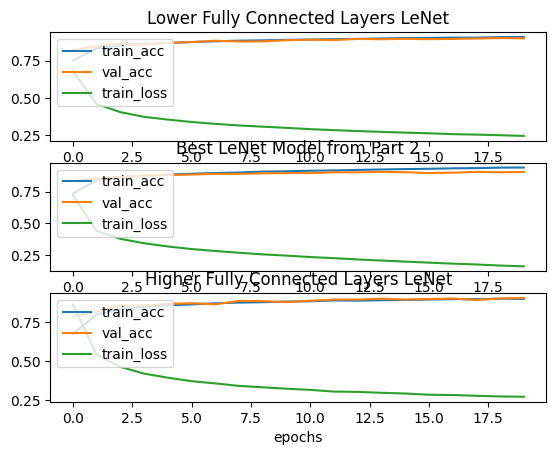

In [20]:
#**************************************************
#4 Adjust the number of fully connected layers with dropout
'''I ran the LeNet model with a lower and higher fully connected layers
    compared to the baseline LeNet Model from lecture'''
#lower Fully connected layers model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("Less fully connected moel with dropout")

#higher Fully Connected layers model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer='SGD',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("More fully connected model with dropout")
BestModel2 = lenetHigh
#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Fully Connected Layers LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(BestModel.history['accuracy'])
plt.plot(BestModel.history['val_accuracy'])
plt.plot(BestModel.history['loss'])
plt.title('Best LeNet Model from Part 2')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Fully Connected Layers LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()

Epoch 1/20
3125/3125 [==============================] - 17s 5ms/step - loss: 2.2673 - accuracy: 0.1919 - val_loss: 2.2179 - val_accuracy: 0.3239
Epoch 2/20
3125/3125 [==============================] - 16s 5ms/step - loss: 2.1100 - accuracy: 0.3147 - val_loss: 2.0293 - val_accuracy: 0.4617
Epoch 3/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.7764 - accuracy: 0.4184 - val_loss: 1.6268 - val_accuracy: 0.5345
Epoch 4/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.3927 - accuracy: 0.4981 - val_loss: 1.2974 - val_accuracy: 0.6006
Epoch 5/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1669 - accuracy: 0.5632 - val_loss: 1.1235 - val_accuracy: 0.6639
Epoch 6/20
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0504 - accuracy: 0.6030 - val_loss: 1.0309 - val_accuracy: 0.6854
Epoch 7/20
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9797 - accuracy: 0.6296 - val_loss: 0.9708 - val_ac

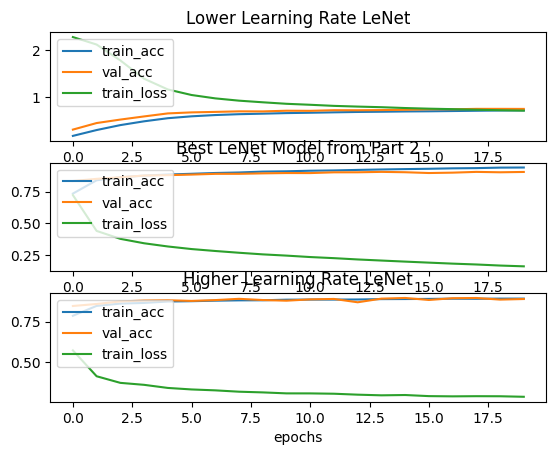

In [21]:
#************************************************
#5 Ajusting Learning rates with dropout
'''I ran the LeNet model with a lower and higher learning rate
    compared to the baseline LeNet Model from lecture'''
#lower learning rate model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetLow = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("lower learning rate mode with dropout")

#higher Learning rate model
LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)])

LeNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

lenetHigh = LeNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("Higher learning rate model with dropout")
45

#plotting 

plt.subplot(3,1,1)
plt.plot(lenetLow.history['accuracy'])
plt.plot(lenetLow.history['val_accuracy'])
plt.plot(lenetLow.history['loss'])
plt.title('Lower Learning Rate LeNet')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(BestModel.history['accuracy'])
plt.plot(BestModel.history['val_accuracy'])
plt.plot(BestModel.history['loss'])
plt.title('Best LeNet Model from Part 2')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(lenetHigh.history['accuracy'])
plt.plot(lenetHigh.history['val_accuracy'])
plt.plot(lenetHigh.history['loss'])
plt.title('Higher Learning Rate LeNet')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()

Problem 4 (30 pts)

AlexNet may be too complex for the Fashion-MNIST dataset, in particular, due to the low resolution of the initial images; try simplifying the model to make the training faster while ensuring that the accuracy stays relatively high. Compare your training loss, training, and validation accuracy against the best model in Problem 3 and Problem 2. Also, measure your computational saving in the number of operations as well as the number of parameters in your network using ptflops https://pypi.org/project/ptflops/

Epoch 1/10
196/196 [==============================] - 127s 647ms/step - loss: 2.0554 - accuracy: 0.2521 - val_loss: 1.3667 - val_accuracy: 0.3971
Epoch 2/10
196/196 [==============================] - 130s 662ms/step - loss: 1.0328 - accuracy: 0.5949 - val_loss: 0.9018 - val_accuracy: 0.6720
Epoch 3/10
196/196 [==============================] - 125s 635ms/step - loss: 0.7313 - accuracy: 0.7179 - val_loss: 0.6855 - val_accuracy: 0.7340
Epoch 4/10
196/196 [==============================] - 126s 640ms/step - loss: 0.6148 - accuracy: 0.7643 - val_loss: 0.6475 - val_accuracy: 0.7587
Epoch 5/10
196/196 [==============================] - 120s 613ms/step - loss: 0.5415 - accuracy: 0.7929 - val_loss: 0.5172 - val_accuracy: 0.8101
Epoch 6/10
196/196 [==============================] - 119s 605ms/step - loss: 0.4788 - accuracy: 0.8231 - val_loss: 0.4971 - val_accuracy: 0.8106
Epoch 7/10
196/196 [==============================] - 132s 673ms/step - loss: 0.4397 - accuracy: 0.8396 - val_loss: 0.4152 -

2023-02-21 19:13:54.828288: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 19:13:54.828385: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session



=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model graph are organized by their names, which is hierarchical like filesystem.
flops: Number of float operations. Note: Please read the implementation for the math behind it.

Profi

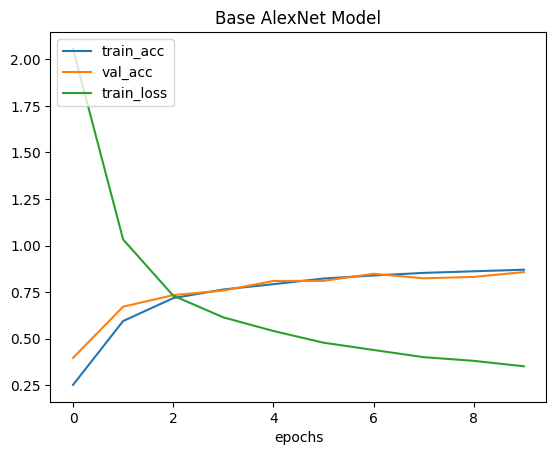

In [23]:

#******************************************************
#PART 4


'''Base AlexNet Model'''

AlexNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)])



AlexNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
alexnet = AlexNet.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_val, y_val))
print("Baseline AlexNet Model")
flops = get_flops(AlexNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(AlexNet.summary())

plt.plot(alexnet.history['accuracy'])
plt.plot(alexnet.history['val_accuracy'])
plt.plot(alexnet.history['loss'])
plt.title('Base AlexNet Model')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')
plt.show()


Epoch 1/20
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9299 - accuracy: 0.6487 - val_loss: 0.5684 - val_accuracy: 0.7844
Epoch 2/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5131 - accuracy: 0.8220 - val_loss: 0.4281 - val_accuracy: 0.8475
Epoch 3/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4446 - accuracy: 0.8447 - val_loss: 0.4181 - val_accuracy: 0.8514
Epoch 4/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4131 - accuracy: 0.8531 - val_loss: 0.4000 - val_accuracy: 0.8511
Epoch 5/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3924 - accuracy: 0.8599 - val_loss: 0.4046 - val_accuracy: 0.8523
Epoch 6/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3751 - accuracy: 0.8663 - val_loss: 0.3830 - val_accuracy: 0.8624
Epoch 7/20
3125/3125 [==============================] - 12s 4ms/step - loss: 0.3629 - accuracy: 0.8698 - val_loss: 0.3658 - val_ac

2023-02-21 19:21:10.846210: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-02-21 19:21:10.846293: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


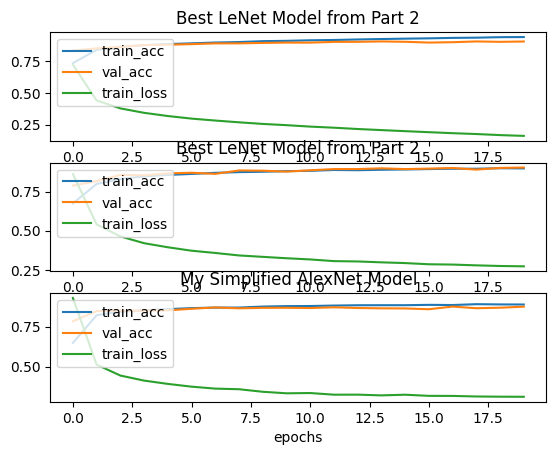

In [24]:

'''My Simplified AlexNet Model'''

AlexNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=12, kernel_size=11, strides=4, activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=48, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10)])



AlexNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
alexnet = AlexNet.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_val, y_val))
print("Simplified AlexNet Model")
flops = get_flops(AlexNet, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")
print(AlexNet.summary())
plt.subplot(3,1,1)
plt.plot(BestModel.history['accuracy'])
plt.plot(BestModel.history['val_accuracy'])
plt.plot(BestModel.history['loss'])
plt.title('Best LeNet Model from Part 2')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,2)
plt.plot(BestModel2.history['accuracy'])
plt.plot(BestModel2.history['val_accuracy'])
plt.plot(BestModel2.history['loss'])
plt.title('Best LeNet Model from Part 2')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.subplot(3,1,3)
plt.plot(alexnet.history['accuracy'])
plt.plot(alexnet.history['val_accuracy'])
plt.plot(alexnet.history['loss'])
plt.title('My Simplified AlexNet Model')
plt.xlabel('epochs')
plt.legend(['train_acc', 'val_acc', 'train_loss'], loc = 'upper left')

plt.show()